In [1]:
import matplotlib.pyplot as plt

### Point

In [2]:
from shapely.geometry import Point

In [3]:
# We have two points x and y in a cartesian coordinate system in geoggraphical lattitude and longitude
# lat,lon
# x, y

lat,lon = 30, 60

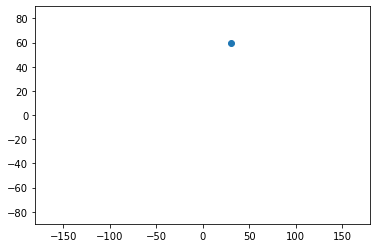

In [4]:
# We can display it on the scatter plot with Matplotlib
x_coordinates = [lat]
y_coordinates = [lon]

plt.scatter(x_coordinates, y_coordinates)
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.show()

In [5]:
# Creating a Point object using shapely's Point CLass
point_1 = Point(lat,lon)

In [6]:
# Accessing coordinate parameters 
print("X and Y of the Point Class: ",point_1.x, point_1.y)
print("Coordinates of Point CLass",point_1.coords[:])

X and Y of the Point Class:  30.0 60.0
Coordinates of Point CLass [(30.0, 60.0)]


In [7]:
# Creating an additional point
point_2 = Point(120, 50)

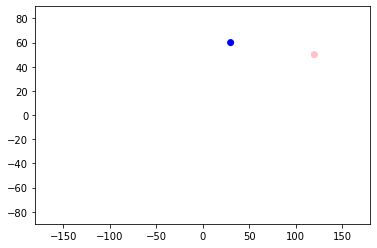

In [8]:
# adding the new point to ower coordinates
x_coordinates.append(point_2.x)
y_coordinates.append(point_2.y)

plt.scatter(x_coordinates, y_coordinates, color=['blue', 'pink'])
plt.ylim(-90,90)
plt.xlim(-180,180)
plt.show()

In [9]:
# Distance between those points 
point_1.distance(point_2)

90.55385138137417

### Collections of Points

In [10]:
from shapely.geometry import MultiPoint

In [11]:
# Having two points we can now create a multipoint object 
points = MultiPoint([point_1, point_2])

In [12]:
# Checking number of points in the collection using GEOMS
len(points.geoms)

2

In [13]:
len(points)

2

In [14]:
# Checking coordinates of the points in the collection
for point in points:
    print(point.x, point.y, 'or', point.coords[:])

30.0 60.0 or [(30.0, 60.0)]
120.0 50.0 or [(120.0, 50.0)]


### Polygon

In [15]:
from shapely.geometry import Polygon

In [16]:
# creatin a new poligon
coordinates = [[1, 1], [2, 1], [2, 2], [1, 2], [1, 1]]
polygon = Polygon(coordinates)

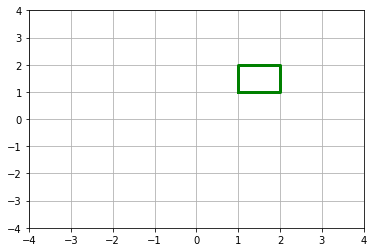

In [17]:
# displaying the polygon
plt.plot([x[0] for x in coordinates], [y[1] for y in coordinates], color = 'green', linewidth=3)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.grid()
plt.show()

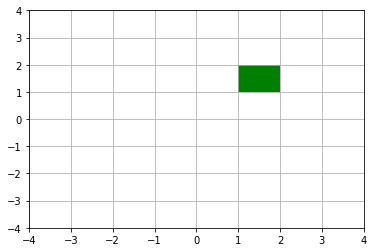

In [18]:
# displaying a polygon with matplotlib.patches
import numpy as np
from matplotlib.patches import Polygon

plt_polygon = Polygon(coordinates, facecolor = 'green')

fig,ax = plt.subplots()

ax.add_patch(plt_polygon)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.grid()
plt.show()

In [19]:
# Centroid
print( polygon.centroid )
print('type', type(polygon.centroid))
print( 'Accessing centroind coordinates: ', polygon.centroid.coords[:] )


POINT (1.5 1.5)
type <class 'shapely.geometry.point.Point'>
Accessing centroind coordinates:  [(1.5, 1.5)]


In [20]:
# area
polygon.area

1.0

In [21]:
# bounds - Returns a (minx, miny, maxx, maxy) tuple (float values) that bounds the object
polygon.bounds

(1.0, 1.0, 2.0, 2.0)

**BUFFER**

In [22]:
# buffer
# https://shapely.readthedocs.io/en/stable/manual.html#object.buffer
polygon_2 = polygon.buffer(3)
polygon_2_coordinates = list(zip(*polygon_2.exterior.coords.xy))
print("Buffor coordinates: ", polygon_2_coordinates)

Buffor coordinates:  [(-2.0, 1.0), (-2.0, 2.0), (-1.9855541800165906, 2.2940514209886813), (-1.9423558412096913, 2.5852709660483844), (-1.8708210071966267, 2.870854031763387), (-1.77163859753386, 3.1480502970952697), (-1.6457637930450648, 3.4141902104779933), (-1.494408836907636, 3.6667106990588065), (-1.319031360088211, 3.9031798524909362), (-1.1213203435596424, 4.121320343559643), (-0.9031798524909362, 4.3190313600882115), (-0.6667106990588059, 4.4944088369076365), (-0.4141902104779931, 4.645763793045065), (-0.1480502970952693, 4.77163859753386), (0.1291459682366135, 4.870821007196627), (0.4147290339516154, 4.942355841209691), (0.705948579011318, 4.985554180016591), (1.0, 5.0), (2.0, 5.0), (2.294051420988681, 4.985554180016591), (2.5852709660483844, 4.942355841209691), (2.870854031763387, 4.870821007196627), (3.1480502970952697, 4.77163859753386), (3.4141902104779933, 4.645763793045065), (3.666710699058807, 4.494408836907636), (3.9031798524909362, 4.319031360088211), (4.1213203435596

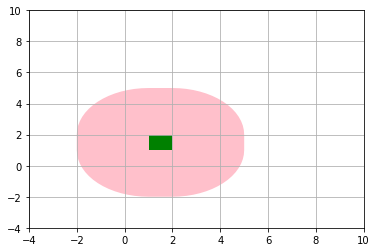

In [23]:
plt_polygon = Polygon(coordinates, facecolor = 'green')
plt_polygon2 = Polygon(polygon_2_coordinates, facecolor = 'pink')

fig,ax = plt.subplots()

ax.add_patch(plt_polygon2)
ax.add_patch(plt_polygon)

plt.ylim(-4,10)
plt.xlim(-4,10)
plt.grid()
plt.show()


In [24]:
# The above buffer is complex due to default settings, perticulary - resolution. 
# The default (resolution of 16) buffer of a point is a polygonal patch with 99.8% of 
# the area of the circular disk it approximates.

# Here is a method how you can create a squere buffer around the 'polygon'

In [25]:
# SQUERE CORNERS BUFFER
# cap_style=3 
# join_style=2
polygon_3 = polygon.buffer(4, cap_style=3, join_style=2)
polygon_3_coordinates = list(zip(*polygon_3.exterior.coords.xy))
print("Square buffor coordinates: ", polygon_3_coordinates)

Square buffor coordinates:  [(-3.0, -3.0), (-3.0, 6.0), (6.0, 6.0), (6.0, -3.0), (-3.0, -3.0)]


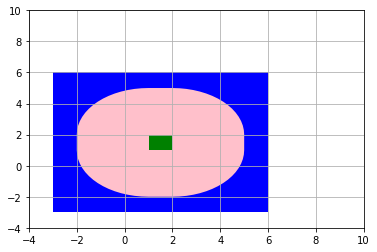

In [26]:
plt_polygon = Polygon(coordinates, facecolor = 'green')
plt_polygon2 = Polygon(polygon_2_coordinates, facecolor = 'pink')
plt_polygon3 = Polygon(polygon_3_coordinates, facecolor = 'blue')

fig,ax = plt.subplots()

ax.add_patch(plt_polygon3)
ax.add_patch(plt_polygon2)
ax.add_patch(plt_polygon)

plt.ylim(-4,10)
plt.xlim(-4,10)
plt.grid()
plt.show()

### Affine Transformations

In [27]:
# https://shapely.readthedocs.io/en/stable/manual.html#affine-transformations

from shapely import affinity


**ROTATE**

In [28]:
# ORGIN CENTROID
rotated_polygon = affinity.rotate(polygon, 45, origin='centroid')

In [29]:
print('Polygon coordinates: ', list(zip(*polygon.exterior.coords.xy)))
print('Rotated coordinates: ', list(zip(*rotated_polygon.exterior.coords.xy)))

Polygon coordinates:  [(1.0, 1.0), (2.0, 1.0), (2.0, 2.0), (1.0, 2.0), (1.0, 1.0)]
Rotated coordinates:  [(1.5, 0.7928932188134523), (2.2071067811865475, 1.5), (1.5, 2.2071067811865475), (0.7928932188134524, 1.5), (1.5, 0.7928932188134523)]


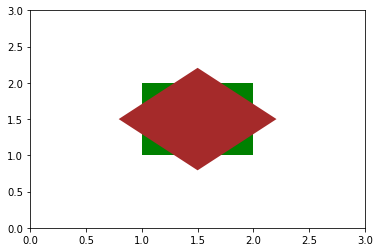

In [30]:
plt_polygon = Polygon(coordinates, facecolor = 'green')
plt_rotated_polygon = Polygon(list(zip(*rotated_polygon.exterior.coords.xy)), facecolor = 'brown')

fig,ax = plt.subplots()

ax.add_patch(plt_polygon)
ax.add_patch(plt_rotated_polygon)

plt.ylim(0,3)
plt.xlim(0,3)

plt.show()

In [31]:
# ORGIN CORNER 1 from the coordinates
corner_coordinates = list(zip(*polygon.exterior.coords.xy))[0]
rotated_polygon = affinity.rotate(polygon, 70, origin=corner_coordinates)
corner_coordinates

(1.0, 1.0)

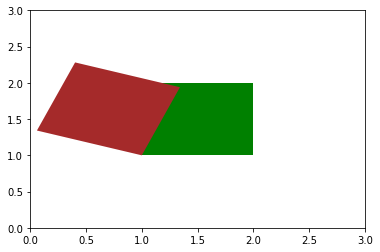

In [32]:
plt_polygon = Polygon(coordinates, facecolor = 'green')
plt_rotated_polygon = Polygon(list(zip(*rotated_polygon.exterior.coords.xy)), facecolor = 'brown')

fig,ax = plt.subplots()

ax.add_patch(plt_polygon)
ax.add_patch(plt_rotated_polygon)

plt.ylim(0,3)
plt.xlim(0,3)

plt.show()

**SCALE**

In [33]:
poly = affinity.scale(polygon, xfact=10, yfact=10, origin='center' )
list(zip(*poly.exterior.coords.xy))

[(-3.5, -3.5), (6.5, -3.5), (6.5, 6.5), (-3.5, 6.5), (-3.5, -3.5)]

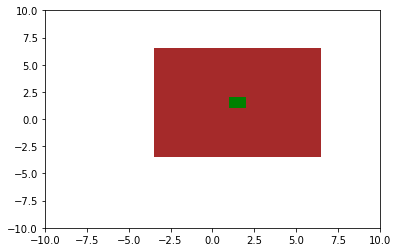

In [34]:
plt_polygon = Polygon(list(zip(*polygon.exterior.coords.xy)), facecolor = 'green')
plt_poly = Polygon(list(zip(*poly.exterior.coords.xy)), facecolor = 'brown')

fig,ax = plt.subplots()

ax.add_patch(plt_poly)
ax.add_patch(plt_polygon)

plt.ylim(-10,10)
plt.xlim(-10,10)

plt.show()

**Transform**

In [35]:
x_coordinates = 16.652003368254142
y_coordinates = 50.72822814023881

In [36]:

# Definition of azimuthal equidistant projection
# : a map projection of the surface of the earth so centered at any given point that a straight line radiating 
# from the center to any other point represents the shortest distance and can be measured to scale

# SOURCE: https://www.merriam-webster.com/dictionary/azimuthal%20equidistant%20projection


In [37]:
from shapely.geometry import Polygon as PolygonShapely
# CENTER OF poly has coordinates of 0,0 THIS IS IMPORTANT to be able to use 'aeqd': Azimuthal Equidistant
poly = PolygonShapely([(-1, -1), (-1, 1), (1, 1), (1, -1), (-1, -1)]) 
print('Poly area: ',poly.area)
poly = affinity.scale(poly, xfact=10, yfact=10, origin='center' ) # increasing the size by 10 times
print('Poly area: ',poly.area)

Poly area:  4.0
Poly area:  400.0


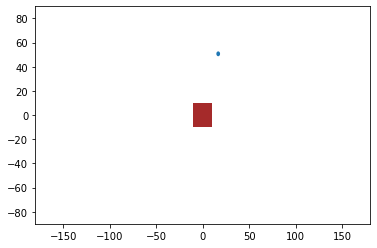

In [38]:
from matplotlib.patches import Circle

plt_poly = Polygon(list(zip(*poly.exterior.coords.xy)), facecolor = 'brown')
point = Circle((x_coordinates, y_coordinates), radius = 2,)

fig,ax = plt.subplots()

ax.add_patch(plt_poly)
ax.add_patch(point)

plt.ylim(-90,90)
plt.xlim(-180,180)

plt.show()

In [39]:
import pyproj
from shapely.ops import transform
from shapely.geometry import Polygon as PolygonShapely


def project(lat,lon):
    wgs84 = pyproj.CRS("WGS84")
    # aeqd: Azimuthal Equidistant
    aeqd = pyproj.CRS(proj="aeqd", lat_0=lat, lon_0=lon, units="km")
    
    return pyproj.Transformer.from_proj( aeqd, wgs84 )

box_wgs84 = transform( project( x_coordinates, y_coordinates ).transform, poly )

list(zip(*box_wgs84.exterior.coords.xy))

[(16.56161945444163, 50.634534062265715),
 (16.742344132188304, 50.63444616991458),
 (16.742344132188304, 50.82201011056302),
 (16.56161945444163, 50.82192221821188),
 (16.56161945444163, 50.634534062265715)]

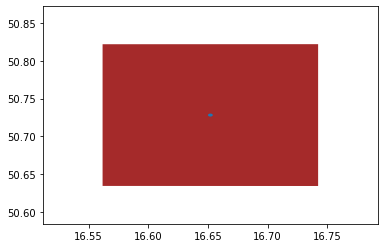

In [40]:
from matplotlib.patches import Circle

plt_poly = Polygon(list(zip(*box_wgs84.exterior.coords.xy)), facecolor = 'brown')
point = Circle((x_coordinates, y_coordinates), radius = 0.002)

fig,ax = plt.subplots()

ax.add_patch(plt_poly)
ax.add_patch(point)

minx, miny, maxx, maxy = box_wgs84.bounds

minx, miny, maxx, maxy = minx - 0.05, miny- 0.05, maxx+ 0.05, maxy+ 0.05


ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.show()

**Save geometry as geojson**


In [41]:
# create geodataframe from the shapely POlygon
# save output as geojson

In [42]:
import geopandas as gpd


crs = {'init': 'epsg:4326'}
box_wgs84_pandas = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[box_wgs84])

point = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[Point(x_coordinates,y_coordinates)])

box_wgs84_pandas.to_file(filename='box_wgs84.geojson', driver='GeoJSON')
point.to_file(filename='point.geojson', driver='GeoJSON')

C:\Users\Ukasz\Anaconda3\envs\geopandas\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


# Create a circle around lat and long coordinates with a 66 km radius

- create point
- create buffer 
- transfrom cartesian coordinates to geographical with the Azimuthal Equidistant projection
- saving output as geojson

In [43]:
from shapely.geometry import Point
from shapely.geometry import Polygon as PolygonShapely
from matplotlib.patches import Polygon as PolygonPlt
from matplotlib.patches import Circle as CirclePlt


In [44]:
# creating a pouint with coordinates 0,0
point = Point(0,0)

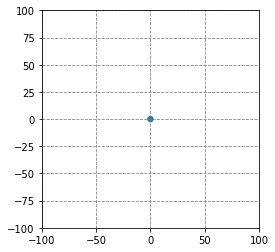

In [45]:
# let's see it on the plot
point_plt = Circle((point.x, point.y), radius = 3)

fig,ax = plt.subplots()
ax.add_patch(point_plt)

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.yaxis.grid(color='gray', 
              linestyle='dashed')
ax.xaxis.grid(color='gray', 
              linestyle='dashed')
plt.gca().set_aspect("equal")

plt.savefig('point_cartesian.png', dpi=200, bbox_inches='tight')
plt.show()

In [46]:
# creating a buffer around a point. 
# We assume that one unit corresponds to one km
buffer = Point(0,0).buffer(66)

<class 'shapely.geometry.polygon.Polygon'>


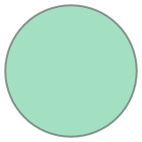

In [47]:
# as we can see the variable buffer is a polygon not a circle
print ( type(buffer) )
buffer

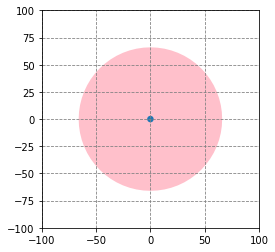

In [48]:
# let's display that on the plot
point_plt = Circle((point.x, point.y), radius = 3)
buffer_plt = Polygon(list(zip(*buffer.exterior.coords.xy)), facecolor = 'pink')

fig,ax = plt.subplots()
ax.add_patch(buffer_plt)
ax.add_patch(point_plt)

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.yaxis.grid(color='gray', 
              linestyle='dashed')
ax.xaxis.grid(color='gray', 
              linestyle='dashed')
plt.gca().set_aspect("equal")
plt.savefig('buffer_point_radius_66.png', dpi=200, bbox_inches='tight')
plt.show()

In [49]:
# converting buffer to geographical coordinates with the given lat and long
# we take lat and long of city called Dzierzoniow in poland
# wiki link: https://en.wikipedia.org/wiki/Dzier%C5%BConi%C3%B3w

x_coordinates = 16.652003368254142
y_coordinates = 50.72822814023881

In [50]:
import pyproj
from shapely.ops import transform


def project(lat,lon):
    wgs84 = pyproj.CRS("WGS84")
    # aeqd: Azimuthal Equidistant
    aeqd = pyproj.CRS(proj="aeqd", lat_0=lat, lon_0=lon, units="km")
    return pyproj.Transformer.from_proj( aeqd, wgs84 )

buffer_wgs84 = transform( 
    project( x_coordinates, y_coordinates).transform, buffer )


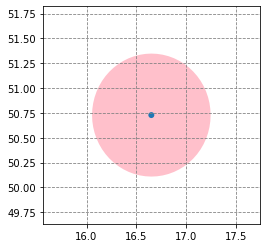

In [51]:
# let's display that on the plot
point_plt = Circle((x_coordinates, y_coordinates), radius = 0.03)
buffer_plt = Polygon(list(zip(*buffer_wgs84.exterior.coords.xy)), facecolor = 'pink')

fig,ax = plt.subplots()
ax.add_patch(buffer_plt)
ax.add_patch(point_plt)

padding = 1
minx, miny, maxx, maxy = box_wgs84.bounds
minx, miny, maxx, maxy = minx - padding, miny- padding, maxx + padding, maxy + padding

ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.yaxis.grid(color='gray', 
              linestyle='dashed')
ax.xaxis.grid(color='gray', 
              linestyle='dashed')
plt.gca().set_aspect("equal")
plt.savefig('buffer_transformed_to_geographical_coordinates.png', dpi=200, bbox_inches='tight')
plt.show()

#### Saving output to GEOJSON

In [52]:
import geopandas as gpd

box_wgs84_pandas = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[buffer_wgs84])
point = gpd.GeoDataFrame(index=[0], geometry=[Point(x_coordinates,y_coordinates)])

box_wgs84_pandas.to_file(filename='box_wgs84.geojson', driver='GeoJSON')
point.to_file(filename='point.geojson', driver='GeoJSON')

C:\Users\Ukasz\Anaconda3\envs\geopandas\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [53]:
print("Area in sq km: " , buffer.area)

Area in sq km:  13662.80522481812


**FURTHER READING:**
- https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/intro-to-coordinate-reference-systems-python/
- https://en.wikipedia.org/wiki/Azimuthal_equidistant_projection
- https://www.merriam-webster.com/dictionary/azimuthal%20equidistant%20projection


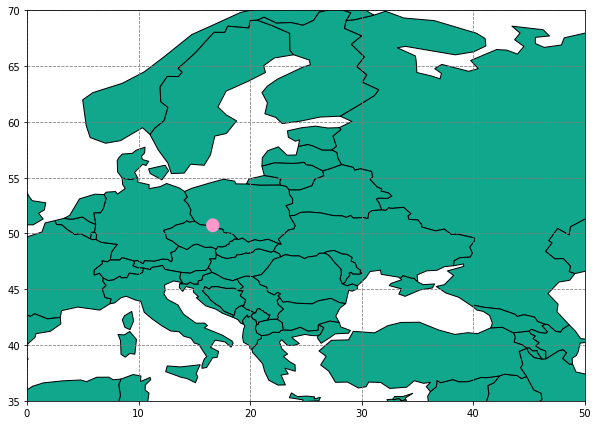

In [63]:
import geopandas

world = geopandas.read_file('naturalearth_lowres')

ax = world.plot(
    color='#11a78d', edgecolor='black', figsize=(10,10))

box_wgs84_pandas.plot(ax=ax, color='#ff99cc')

ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect("equal")
ax.set_xlim(0, 50)
ax.set_ylim(35, 70)
plt.savefig('buffer_on_map.png', dpi=200, bbox_inches='tight')
plt.show()

#### CRS comparison

In [55]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [56]:
box_wgs84_pandas.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich